### Super Market Sales Prediction

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

In [55]:
# load data
data = pd.read_csv("supermarket_sales.csv")

In [56]:
data.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [57]:
# Summary statistics
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [59]:
data.shape

(1000, 17)

In [60]:
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [61]:
# Check for nulls
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [62]:
data.drop('gross margin percentage', axis=1, inplace=True)
#data.drop('Invoice ID', axis=1, inplace=True)

### Exploratory Data Analysis

In [63]:
# Correlation analysis for numerical data
data.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000


'\n    We can see here data for Quantity is highly correlated with Tax, Cogs (cost of goods), gross income\n'

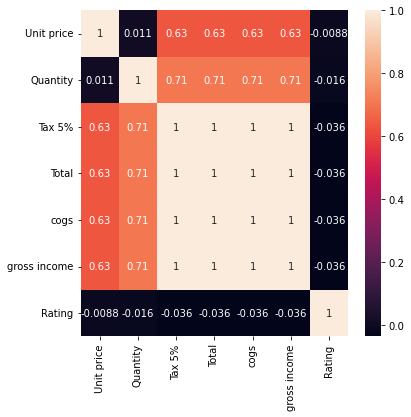

In [65]:
# Heat Map to show correlation between data attributes
plt.figure(figsize = (6,6))
sns.heatmap(data.corr(), annot =True)

'''
    We can see here, data for Quantity is highly correlated with Tax, Cogs (cost of goods), gross income
'''

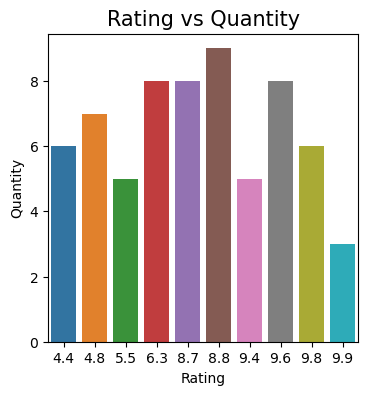

In [86]:
plt.style.use("default")
plt.figure(figsize=(4,4))
sns.barplot(x="Rating", y="Quantity", data=data[170:180])
plt.title("Rating vs Quantity",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Quantity")
plt.show()

<AxesSubplot:xlabel='gross income'>

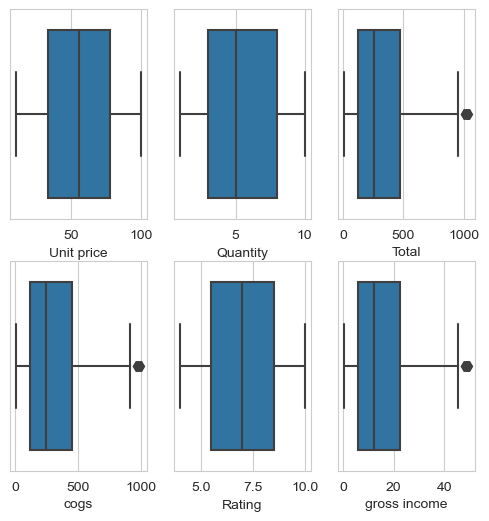

In [88]:

'''
    A boxplot is a standardized way of displaying the distribution of data based 
    on summary values “minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). 
    It can detect outliers in the given attribute data.
    
'''
plt.figure(figsize=(6,6))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Unit price',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='Quantity',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='Total',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='cogs',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='Rating',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='gross income',data=data)

In [66]:
#get categorialfeatures

list_category=[]
for i in list(data.columns):
    if data[i].dtype=='object':
        list_category.append(i)

In [67]:
'''
    LabelEncoder package can be used to normalize labels.
    Used to convert text or categorical data into numerical data.
'''

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [68]:
for i in list_category:
    data[i]=le.fit_transform(data[i])

In [69]:
data.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,26,146,2,522.83,26.1415,9.1
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,87,23,0,76.40,3.8200,9.6
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,81,155,1,324.31,16.2155,7.4


In [70]:
y=data['Gender']
x=data.drop('Gender',axis=1)

In [71]:
x.head(3)

,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
0,814,0,2,0,3,74.69,7,26.1415,548.9715,26,146,2,522.83,26.1415,9.1
1,142,2,1,1,0,15.28,5,3.8200,80.2200,87,23,0,76.40,3.8200,9.6
2,653,0,2,1,4,46.33,7,16.2155,340.5255,81,155,1,324.31,16.2155,7.4


### Train & Test Data

In [72]:
'''
    train_test_split package to split your data
'''
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [73]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

800
200
800
200


In [74]:
'''
    Naive Bayes

    It is a classification technique with an assumption of independence among predictors. 
    In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class 
    is unrelated to the presence of any other feature.
'''

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [84]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.51      0.35      0.41       100
           1       0.50      0.66      0.57       100

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.49       200
weighted avg       0.51      0.51      0.49       200

Confusion Matrix:
 [[35 65]
 [34 66]]
Training Score:
 55.125


In [ ]:
'''
    Evaluation metrics explanation for Naive Bayes
    
    Precision: from all the gender classes, how many we predicted correctly.
    Recall: from all the classes we have predicted as gender, how many are actually positive.
    f1-score: harmonic mean of precision and recall
'''


In [48]:
x_train.head(10)

,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
687,680,0,2,0,4,63.56,10,31.7800,667.3800,7,369,0,635.60,31.7800,4.3
500,215,1,0,0,5,73.97,1,3.6985,77.6685,52,277,1,73.97,3.6985,5.4
332,571,0,2,1,1,77.02,5,19.2550,404.3550,52,283,0,385.10,19.2550,5.5
979,58,1,0,1,2,67.77,1,3.3885,71.1585,53,494,1,67.77,3.3885,6.5
817,908,0,2,1,2,33.88,8,13.5520,284.5920,10,481,2,271.04,13.5520,9.6
620,398,0,2,1,2,71.68,3,10.7520,225.7920,79,258,1,215.04,10.7520,9.2
814,841,0,2,0,0,48.62,8,19.4480,408.4080,16,45,0,388.96,19.4480,5.0
516,404,1,0,0,3,54.86,5,13.7150,288.0150,80,320,2,274.30,13.7150,9.8
518,136,0,2,1,4,34.73,2,3.4730,72.9330,59,382,2,69.46,3.4730,9.7
940,757,0,2,1,2,66.52,4,13.3040,279.3840,70,382,2,266.08,13.3040,6.9


In [44]:
'''
     DECISION TREE CLASSIFIER

     Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. 
     The creation of sub-nodes increases the homogeneity of resultant sub-nodes. ... 
     The decision tree splits the nodes on all available variables and then selects the split 
     which results in most homogeneous sub-nodes.
'''

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [45]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.52      0.78      0.62       100
           1       0.55      0.27      0.36       100

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.49       200
weighted avg       0.53      0.53      0.49       200

Confusion Matrix:
 [[78 22]
 [73 27]]
Training Score:
 63.87500000000001


In [46]:
'''
    Random Forest Classifier

    A random forest classifier. A random forest is a meta estimator that fits a number 
    of decision tree classifiers on various sub-samples of the dataset and uses averaging 
    to improve the predictive accuracy and control over-fitting.
'''

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [47]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.46      0.49      0.48       100
           1       0.46      0.43      0.44       100

    accuracy                           0.46       200
   macro avg       0.46      0.46      0.46       200
weighted avg       0.46      0.46      0.46       200

Confusion Matrix:
 [[49 51]
 [57 43]]
Training Score:
 100.0


In [ ]:
# Conclusion

'''
    Naive Bayes Score: Training Score - 55.125
    Decision Tree: Training Score - 63.87500000000001
    The Random Forest Classifier produced the best results with 100% accuracy 
    based on the dataset.
'''